## Import libraries

In [56]:
#Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='darkgrid')
from scipy import stats 

#preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

#ML Models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier 

#Calling Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## Data Representation

In [3]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Wrangling

**Check Missing Values**

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check Duplicates**

In [7]:
df.duplicated().sum()

0

**Check Outliers**

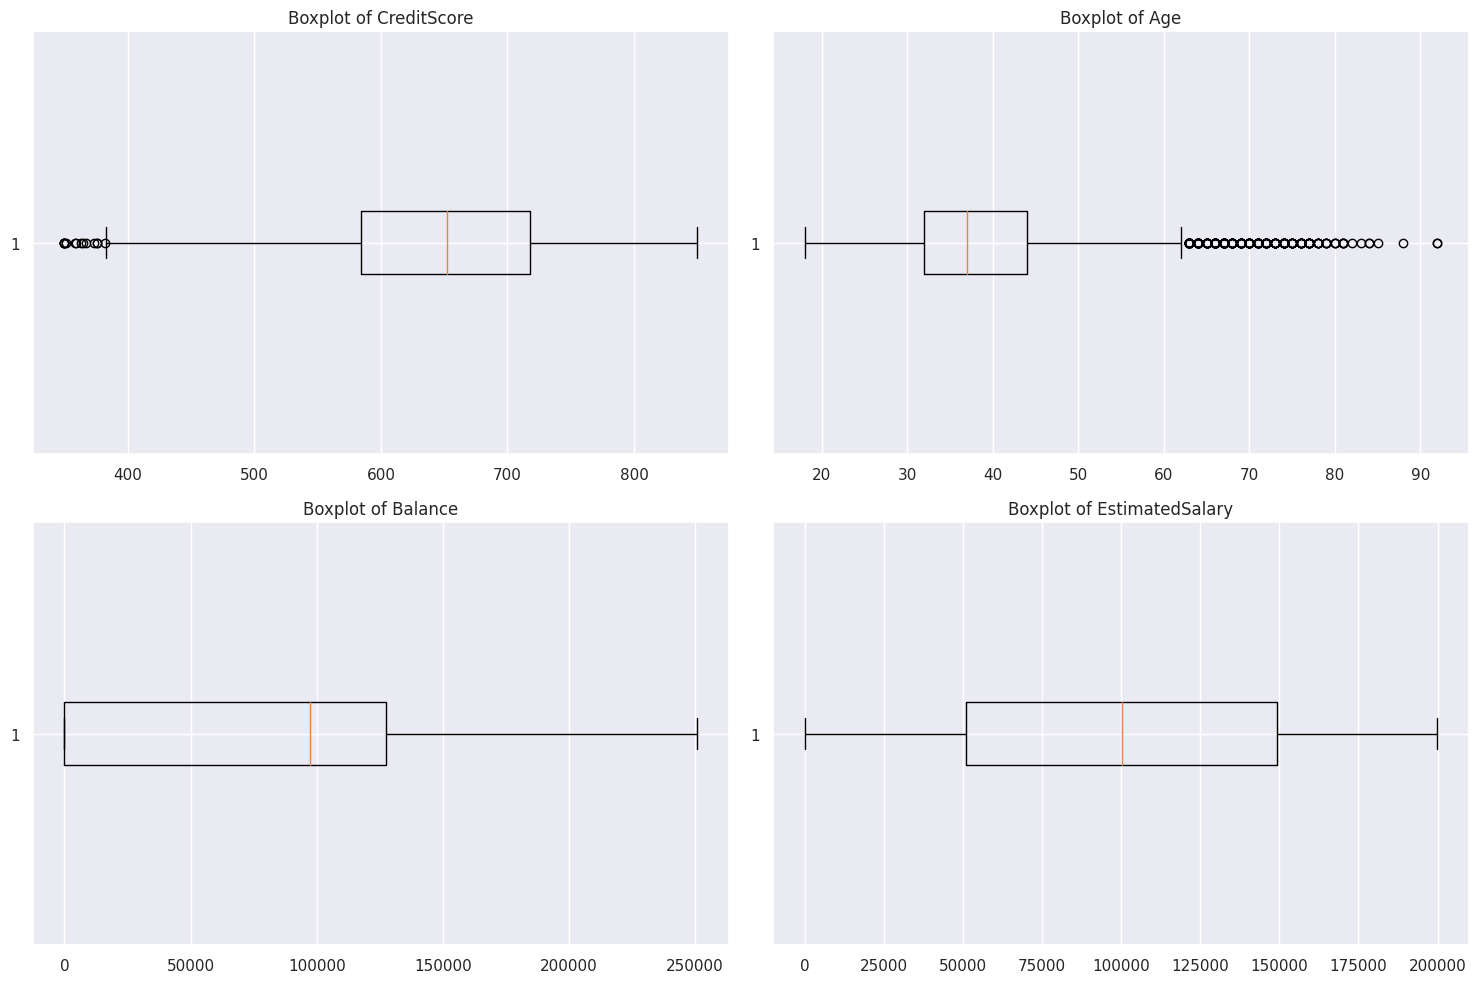

In [8]:
#Check if exist outliers or not 
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15,10))
#i for value item in list 
for i, feature in enumerate (numerical_features, start=1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()
    

## Exploratory Data Analysis ##

#### **Univariate Analysis**

**CreditScore column**

In [9]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

/tmp/ipykernel_30/692130759.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['CreditScore'], fill=True, palette='set2')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


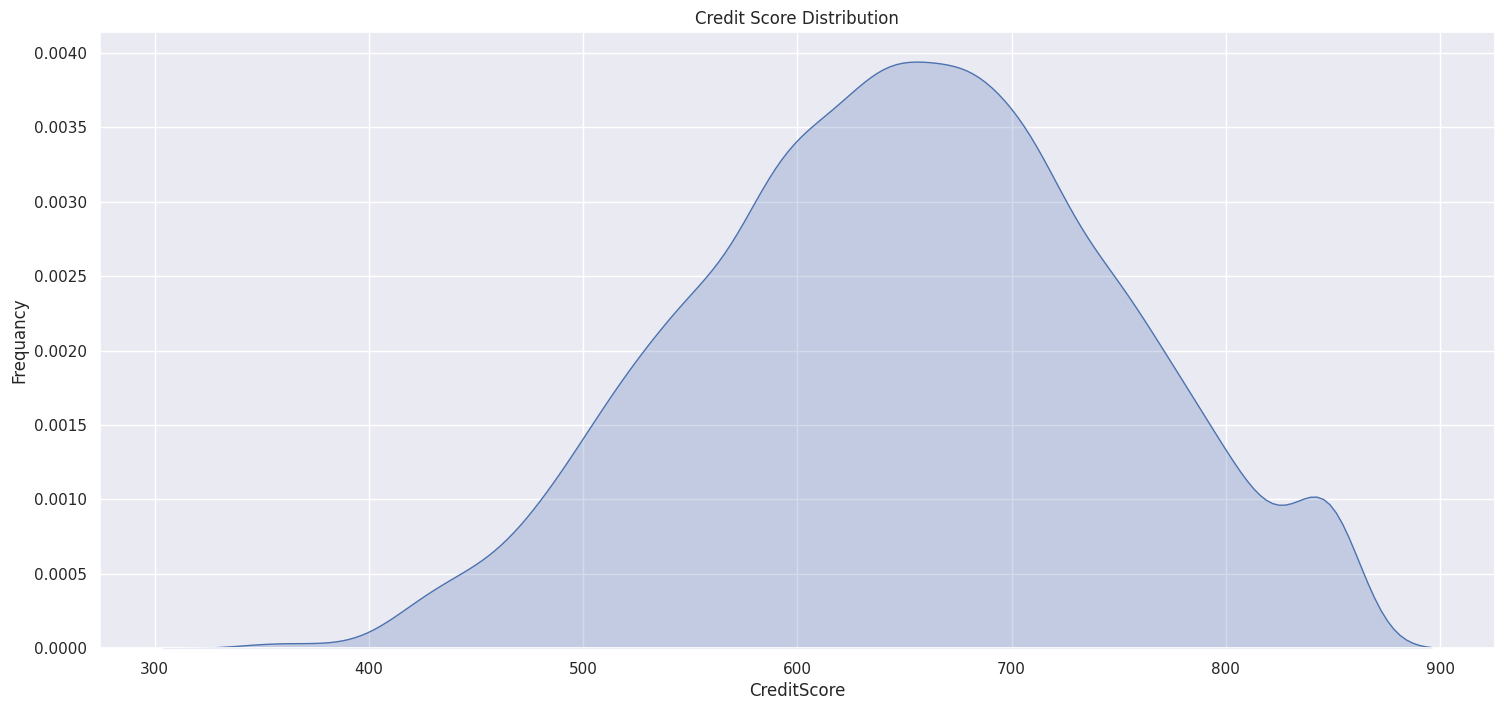

In [10]:
plt.figure(figsize=(18,8))
sns.kdeplot(df['CreditScore'], fill=True, palette='set2')
plt.title('Credit Score Distribution')

plt.xlabel('CreditScore')
plt.ylabel('Frequancy')
plt.show()

**Geography Column**

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

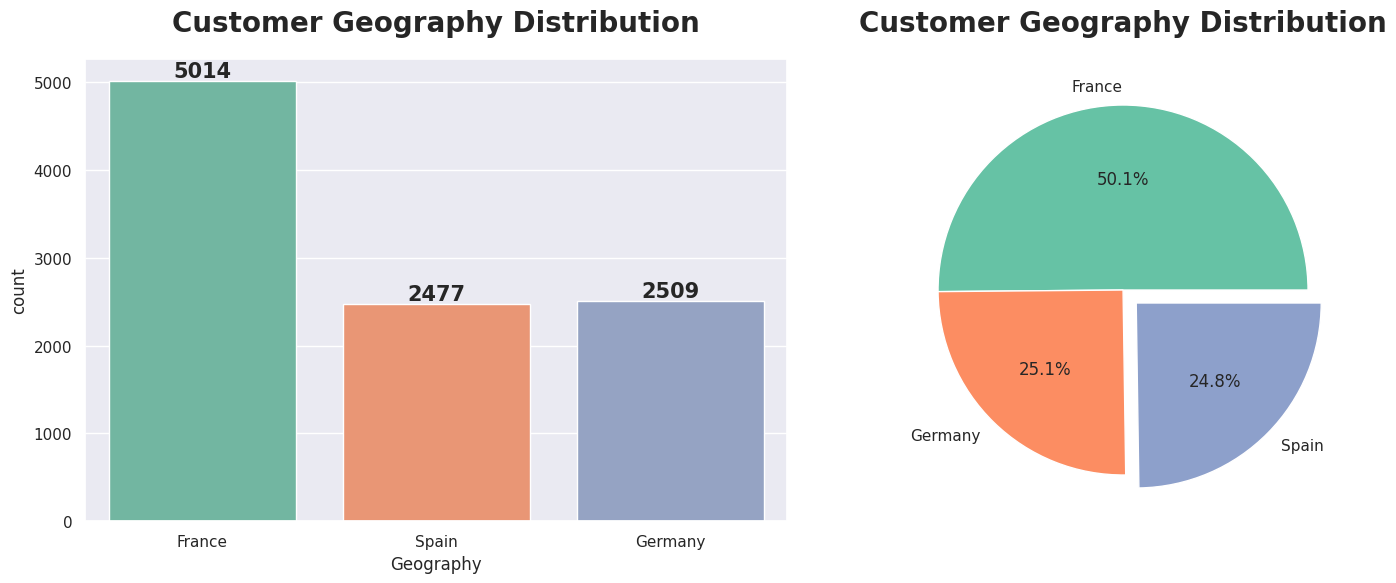

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

count = df['Geography'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Geography', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Geography Distribution', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Customer Geography Distribution', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()


**Gender Column**

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

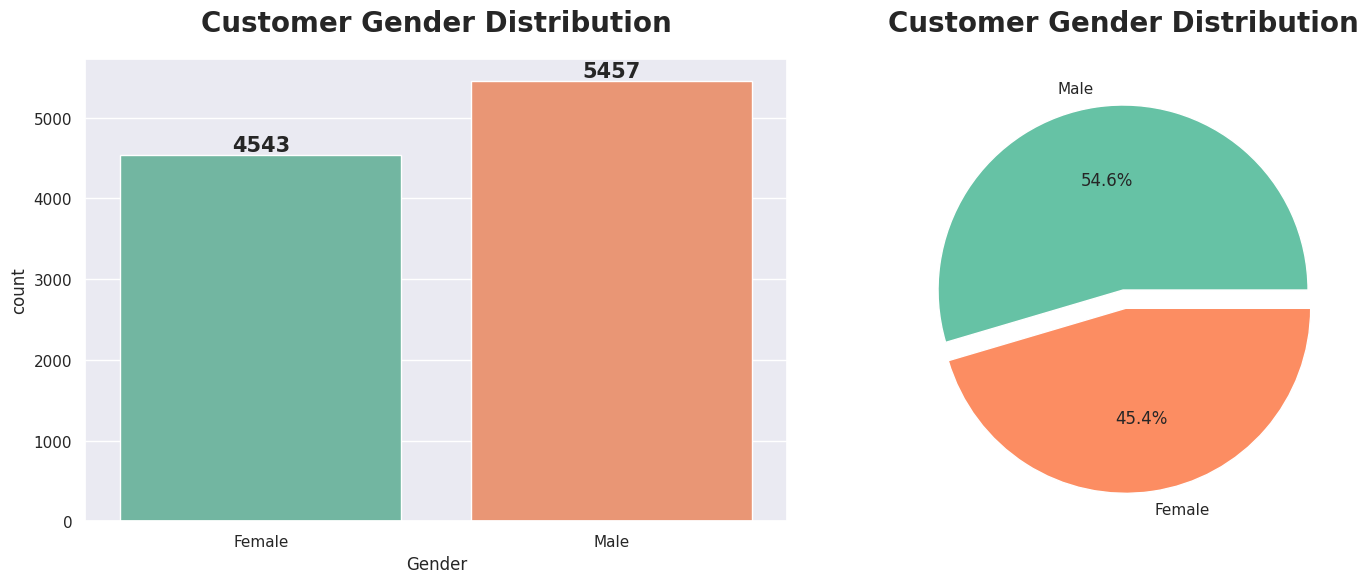

In [14]:
count = df['Gender'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Gender', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Gender Distribution', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Customer Gender Distribution', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()


 **Age Column**

In [15]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

/tmp/ipykernel_30/4111236922.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Age'], fill=True, palette='set2')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


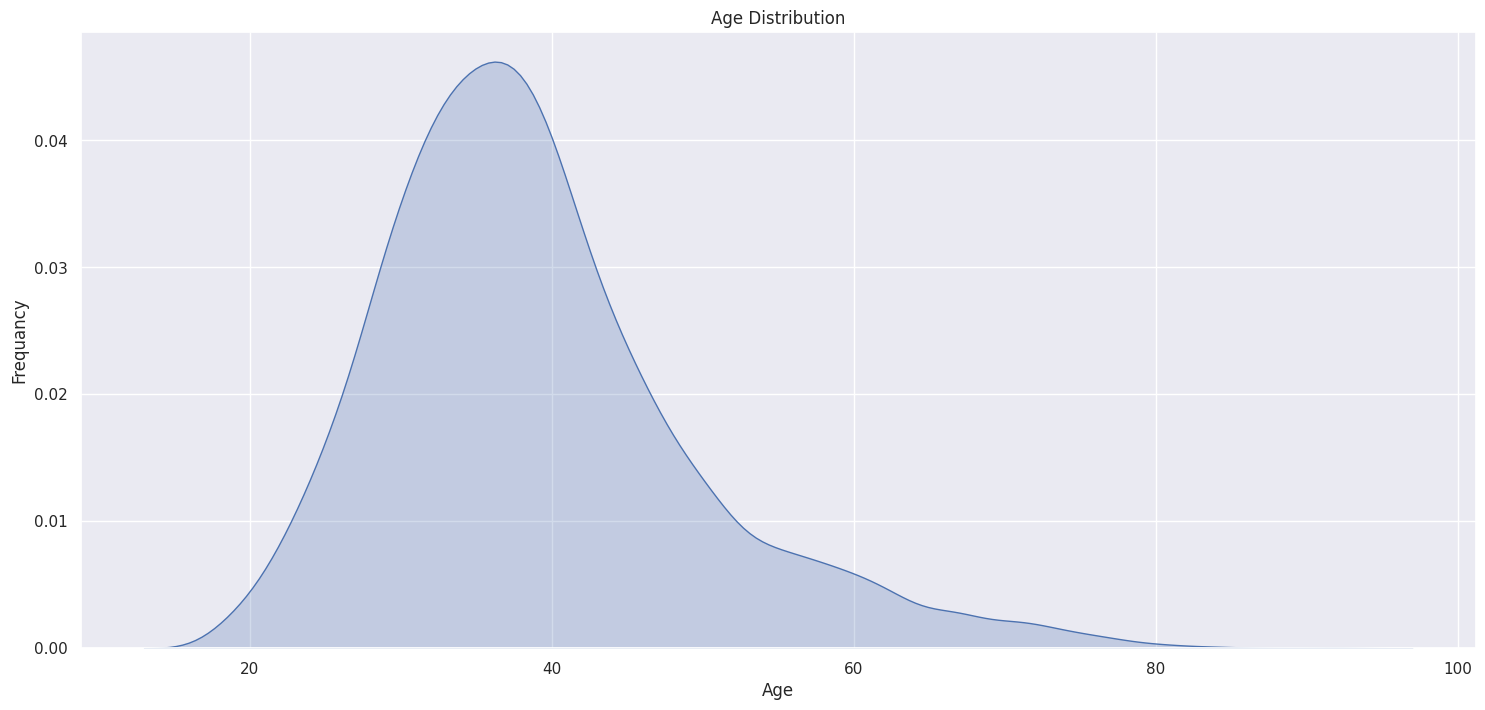

In [16]:
plt.figure(figsize=(18,8))
sns.kdeplot(df['Age'], fill=True, palette='set2')
plt.title('Age Distribution')

plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()

**Tenure Column**

In [17]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

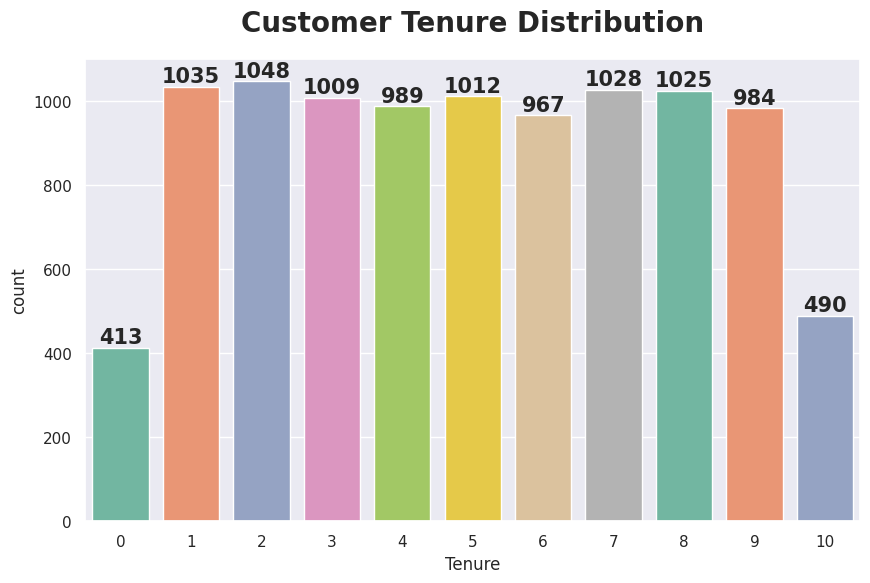

In [18]:
plt.figure(figsize=(10, 6))

# Bar plot on the left
ax = sns.countplot(data=df, x='Tenure', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Tenure Distribution', fontweight='black', size=20, pad=20)

plt.show()

#Uniform Distribution

**Balance Coulmn**

In [19]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

/tmp/ipykernel_30/3378206098.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Balance'], fill=True, palette='set2')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


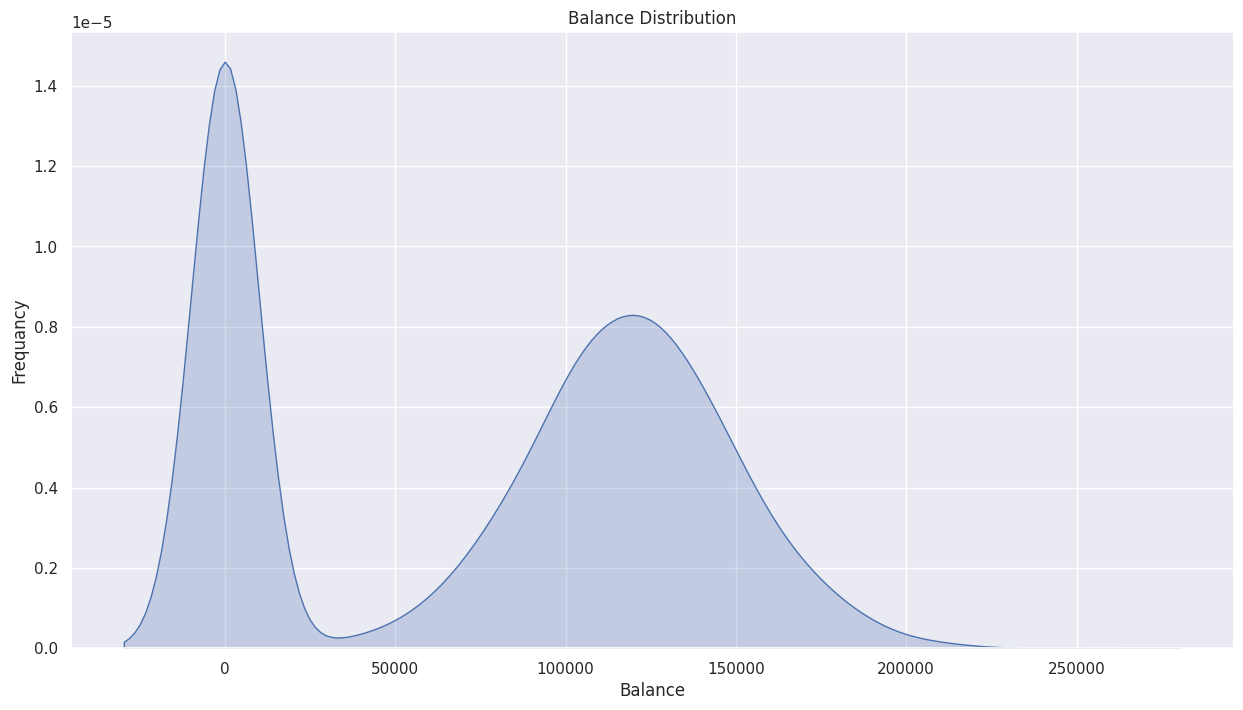

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Balance'], fill=True, palette='set2')
plt.title('Balance Distribution')

plt.xlabel('Balance')
plt.ylabel('Frequancy')
plt.show()

**NumOfProducts Column**

In [21]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

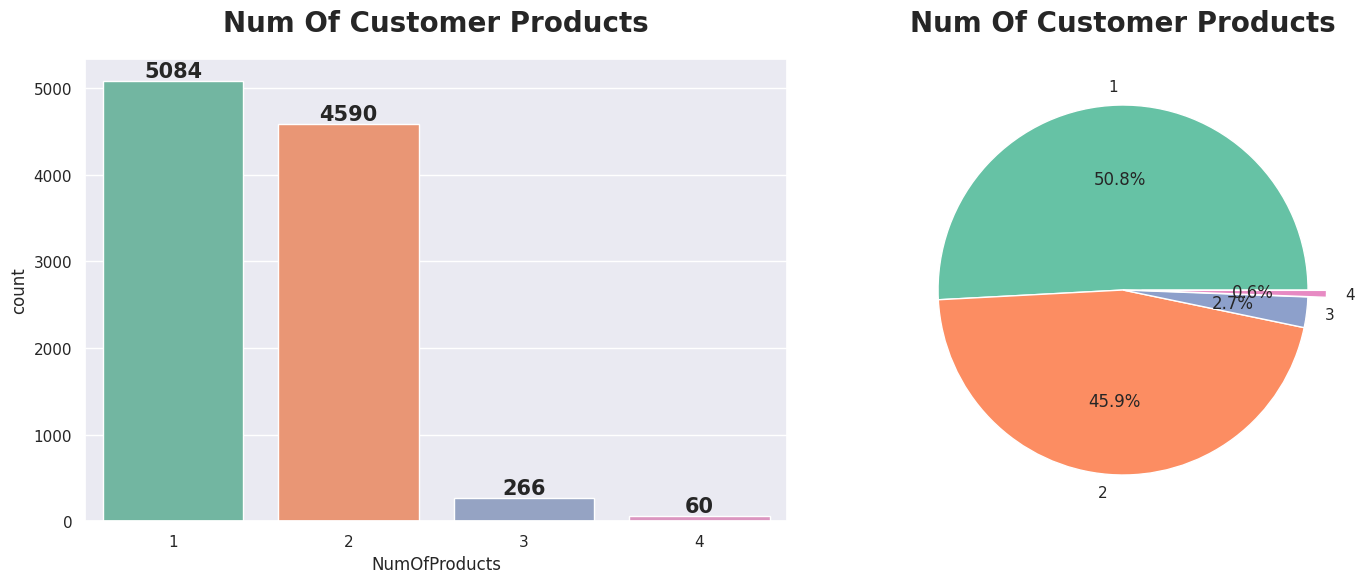

In [22]:
count = df['NumOfProducts'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='NumOfProducts', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Num Of Customer Products', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.0, 0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Num Of Customer Products', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**HasCrCard	Coumn**

In [24]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

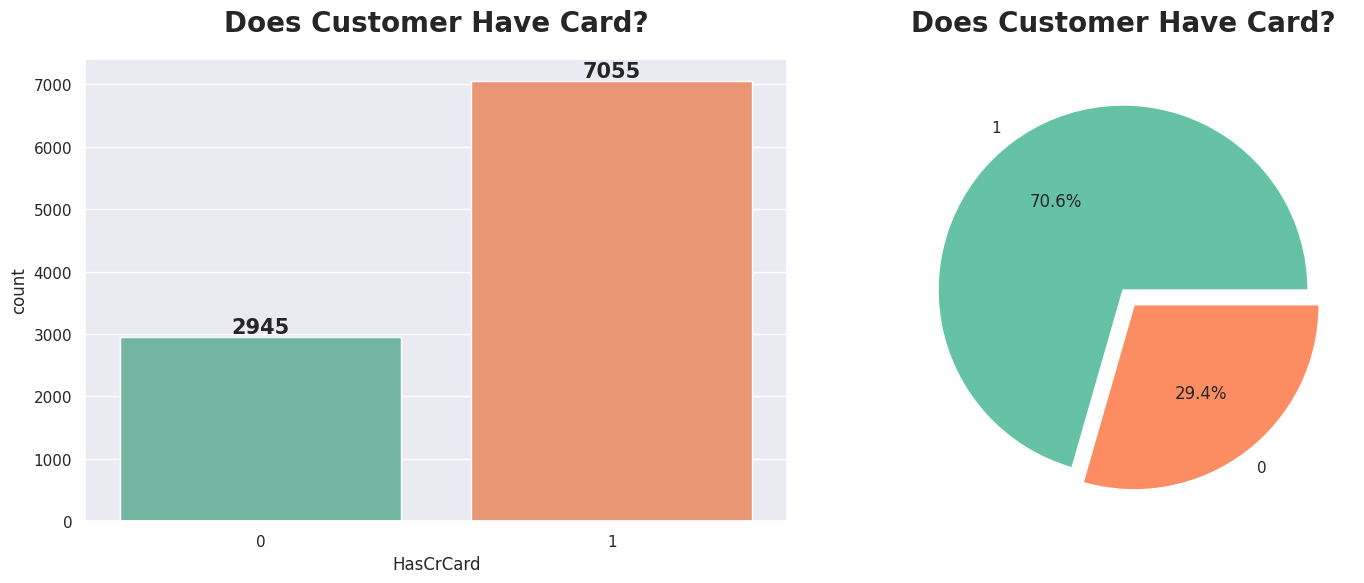

In [25]:
count = df['HasCrCard'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='HasCrCard', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Does Customer Have Card?', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Does Customer Have Card?', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()


**IsActiveMember column**

In [26]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

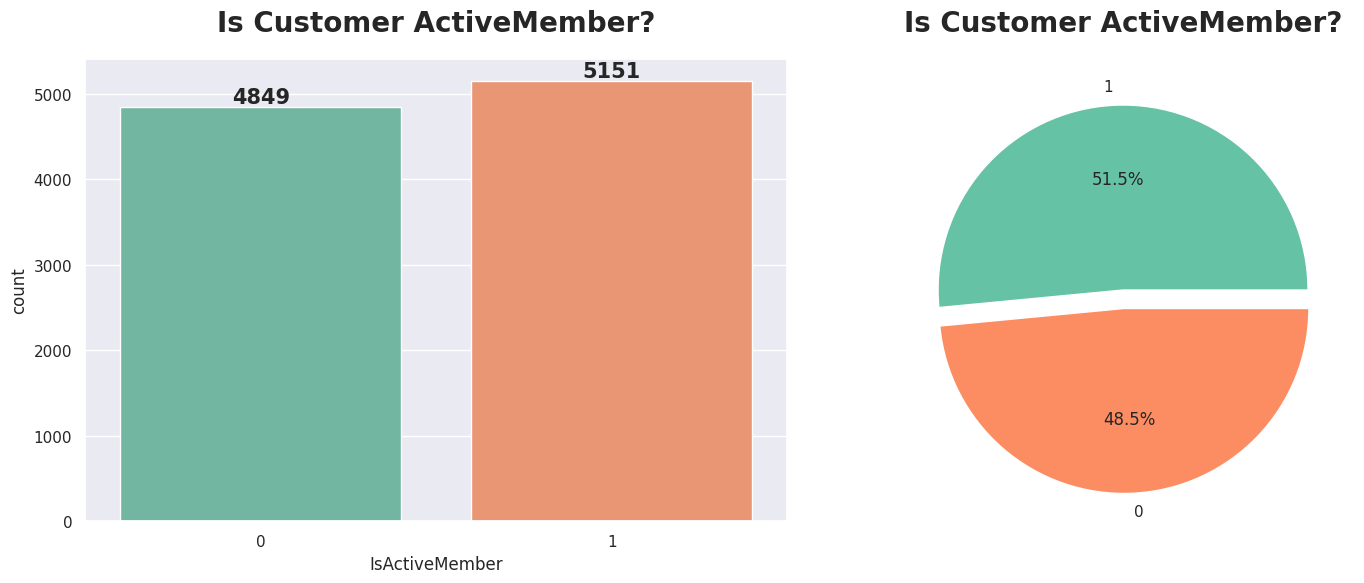

In [27]:
count = df['IsActiveMember'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='IsActiveMember', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Is Customer ActiveMember?', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Is Customer ActiveMember?', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()

**EstimatedSalary column**

In [28]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

/tmp/ipykernel_30/1020451210.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['EstimatedSalary'], fill=True, palette='set2')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


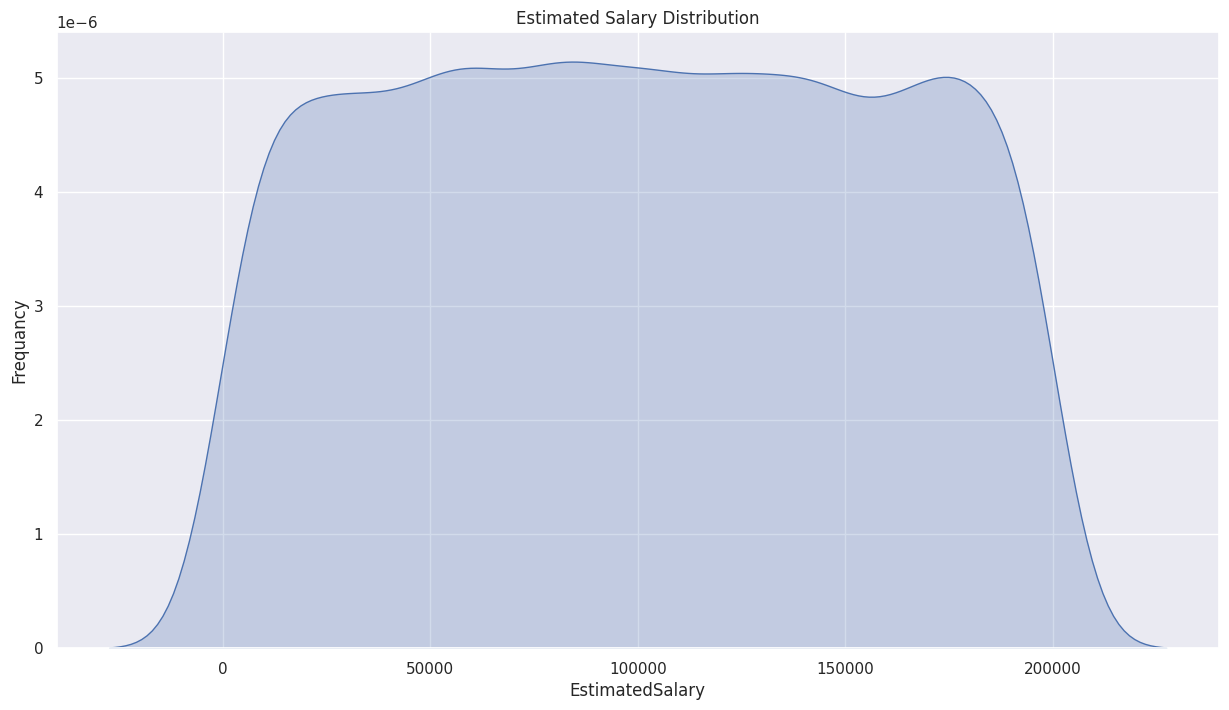

In [29]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['EstimatedSalary'], fill=True, palette='set2')
plt.title('Estimated Salary Distribution')

plt.xlabel('EstimatedSalary')
plt.ylabel('Frequancy')
plt.show()

**Exited column**

In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

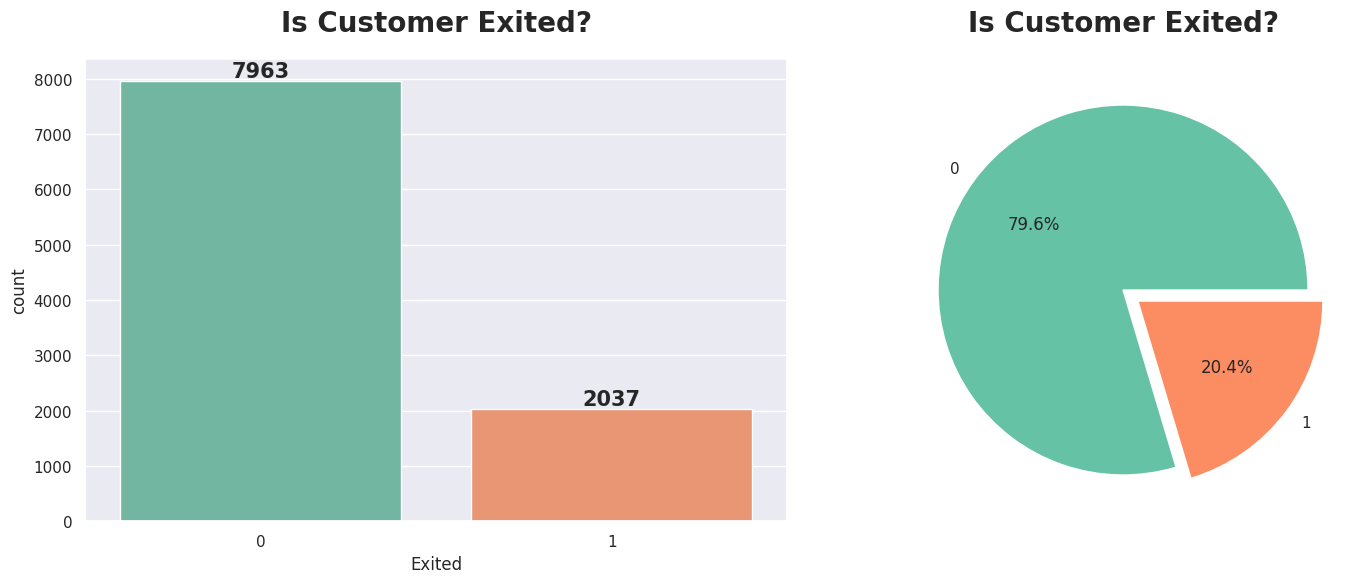

In [31]:
count = df['Exited'].value_counts()

plt.figure(figsize=(15, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Exited', palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Is Customer Exited?', fontweight='black', size=20, pad=20)

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, explode=[0.0, 0.1],
        colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Is Customer Exited?', fontweight='black', size=20, pad=20)

plt.tight_layout()  # Ensures the subplots fit within the figure area
plt.show()

## **Bivariate Analysis**
**Determine Insights**

**Numerical Features vs. Target**

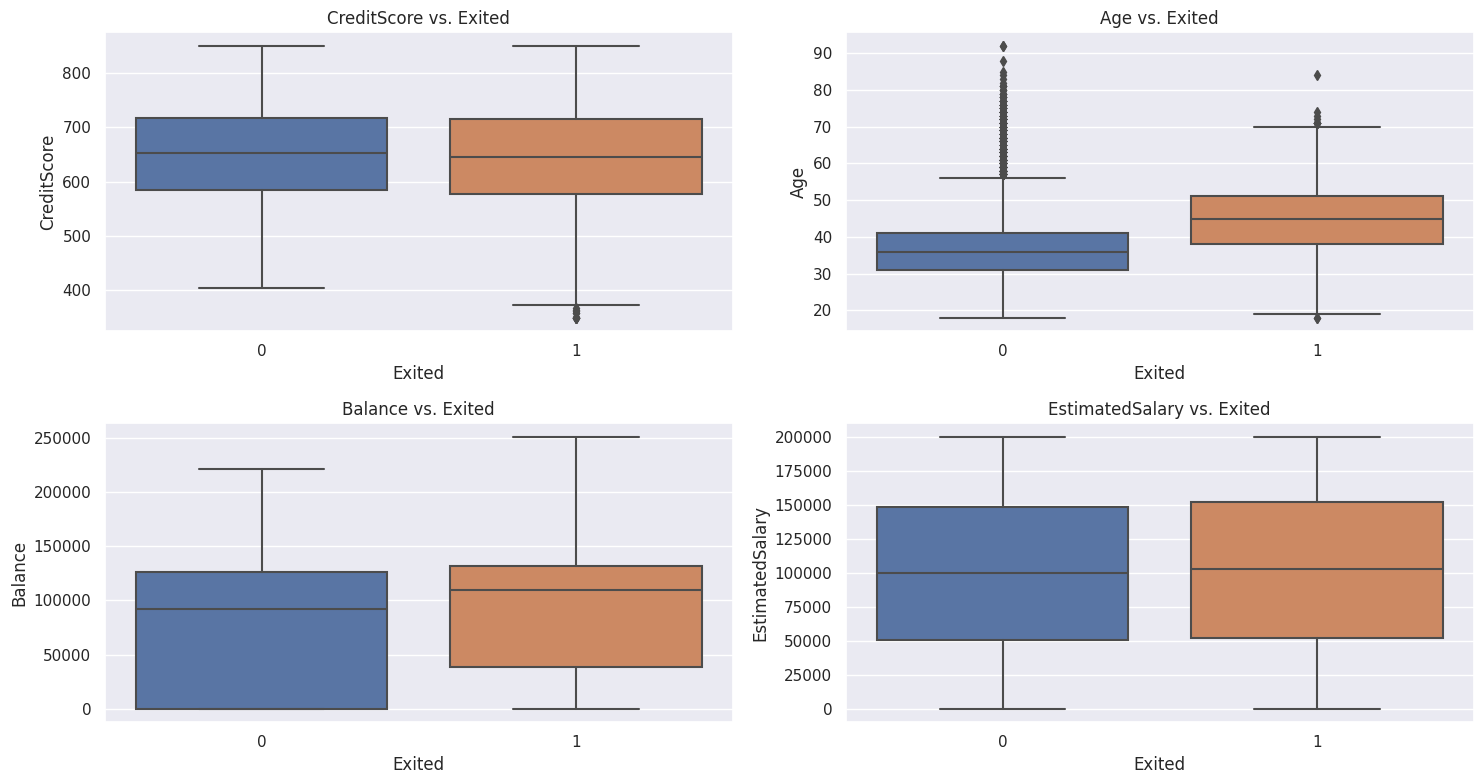

In [32]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15,8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs. Exited')
    plt.xlabel('Exited')
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()


**Categorical Feature vs. Target**

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


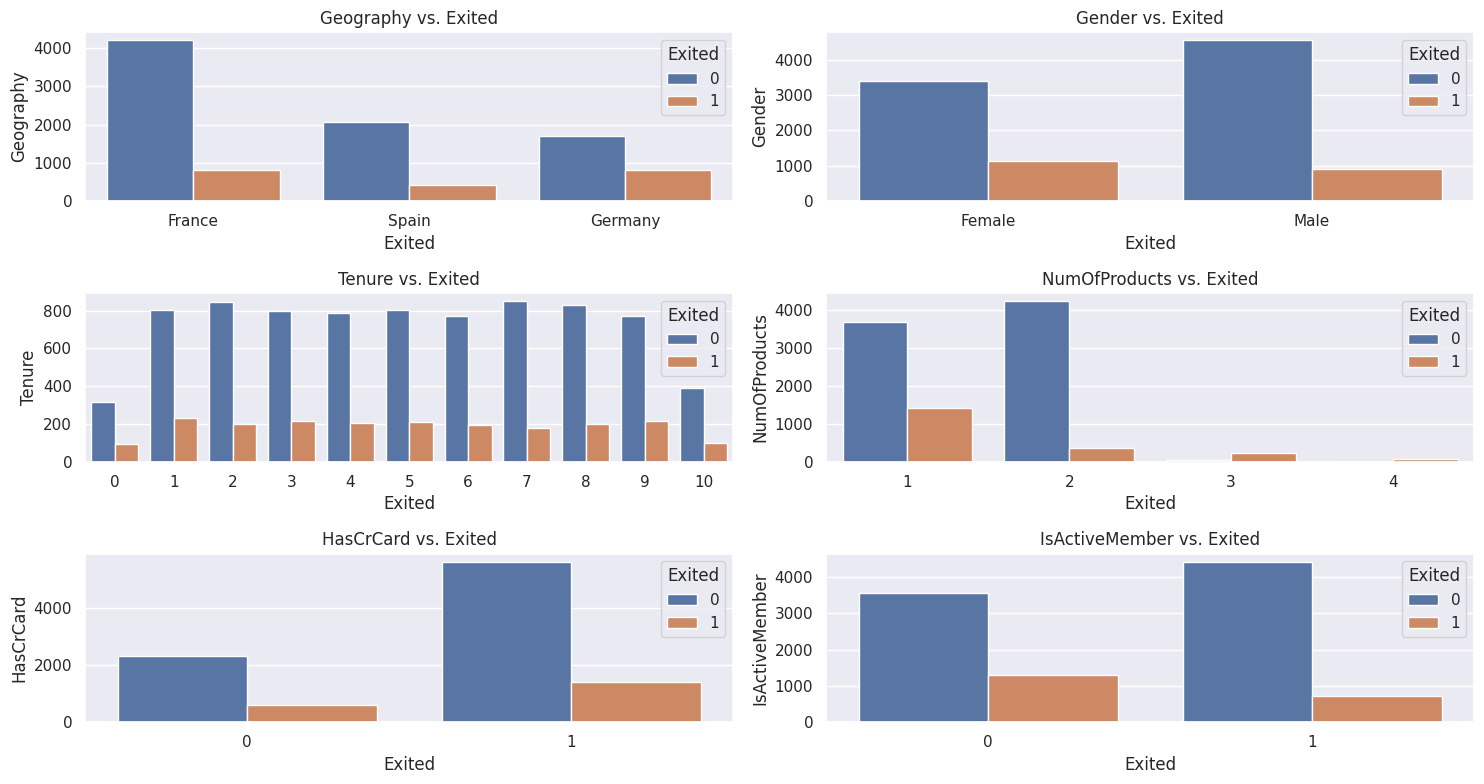

In [34]:
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15,8))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(3,2,i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs. Exited')
    plt.xlabel('Exited')
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()


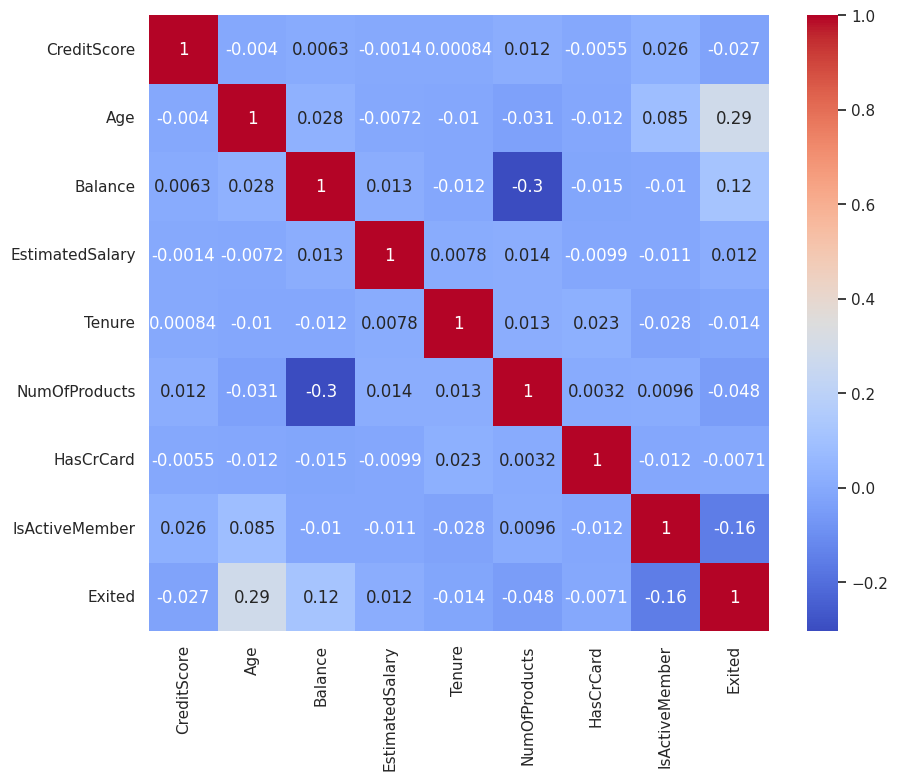

In [35]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts','HasCrCard', 'IsActiveMember','Exited']

cm = df[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.show()

## **Data Preprocessing**

**Drop Unneeded columns**

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.drop(columns=['RowNumber', 'CustomerId',	'Surname'], inplace=True)

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Define Features 'X' and Target 'Y'**

In [39]:
# 1:rows , 2:columns
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [40]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [41]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Data Encoding**

In [42]:
x= pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=False)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


**Data Scaling**

In [43]:
scaler = StandardScaler()

numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure']

x[numerical_features] = scaler.fit_transform(x[numerical_features])

In [44]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,True,False,False,True,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,False,False,True,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,True,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,True,False,False,True,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,True,False,False,False,True
9996,-1.391939,-0.373958,1.724464,-0.306379,1,1,1,0.027988,True,False,False,False,True
9997,0.604988,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,True,False,False,True,False
9998,1.256835,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,False,True,False,False,True


**Data Spliting**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Machine Learning Models**

In [46]:
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
lr_model.score(x_train, y_train)

0.811125

In [48]:
y_pred = lr_model.predict(x_test)

In [49]:
print(accuracy_score(y_test, y_pred))

0.8115


In [53]:
confusion_matrix(y_test, y_pred)

array([[1544,   63],
       [ 314,   79]])

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay


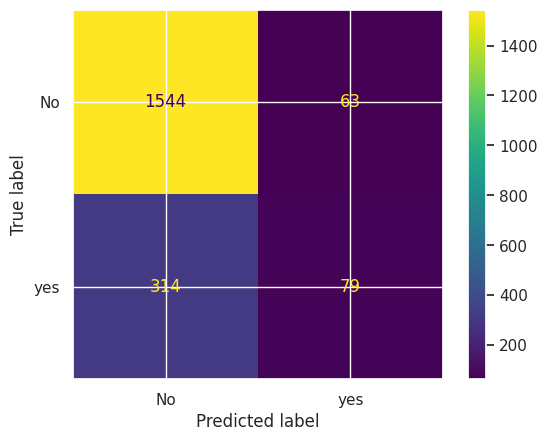

In [58]:
fig = ConfusionMatrixDisplay(cm, display_labels=['No', 'yes'])
fig.plot()

In [72]:
svc = SVC(C=15)

svc.fit(x_train, y_train)


SVC(C=15)

In [73]:
print(svc.score(x_train, y_train))

0.888125


In [74]:
y_pred = svc.predict(x_test)

In [75]:
print(accuracy_score(y_test, y_pred))

0.863


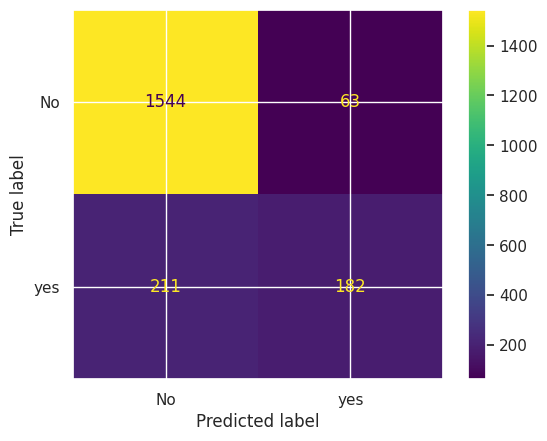

In [77]:
cm = confusion_matrix(y_test, y_pred)

fig = ConfusionMatrixDisplay(cm, display_labels=['No', 'yes'])
fig.plot()

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.score(x_train, y_train)

0.8955

In [82]:
y_pred = knn.predict(x_test)

In [83]:
print(accuracy_score(y_test, y_pred))

0.8295


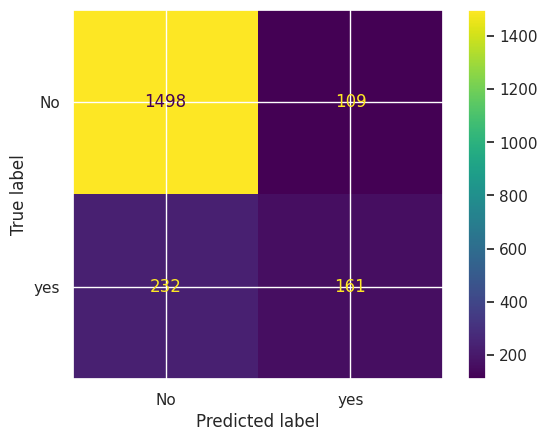

In [84]:
cm = confusion_matrix(y_test, y_pred)

fig = ConfusionMatrixDisplay(cm, display_labels=['No', 'yes'])
fig.plot()

In [93]:
dt = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01)

In [94]:
dt.score(x_train, y_train)

0.840125

In [95]:
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.844


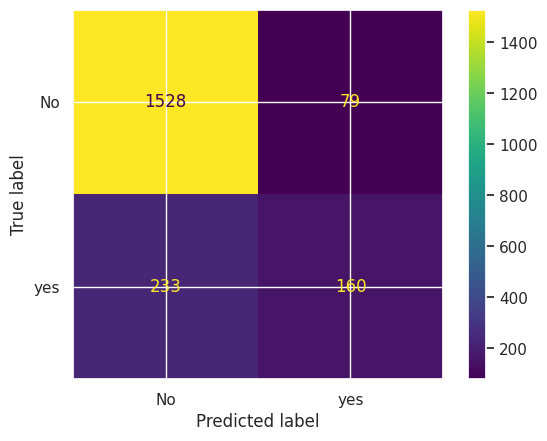

In [96]:
cm = confusion_matrix(y_test, y_pred)

fig = ConfusionMatrixDisplay(cm, display_labels=['No', 'yes'])
fig.plot()

In [108]:
rf = RandomForestClassifier(n_estimators=300, min_impurity_decrease=0.01)
rf.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01, n_estimators=300)

In [109]:
rf.score(x_train, y_train)

0.7945

In [110]:
rf.score(x_test, y_test)

0.8035

In [115]:
bagg = BaggingClassifier(estimator=SVC(C=15), n_estimators=100)
bagg.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(C=15), n_estimators=100)

In [116]:
bagg.score(x_train, y_train)

0.891875

In [117]:
bagg.score(x_test, y_test)

0.863